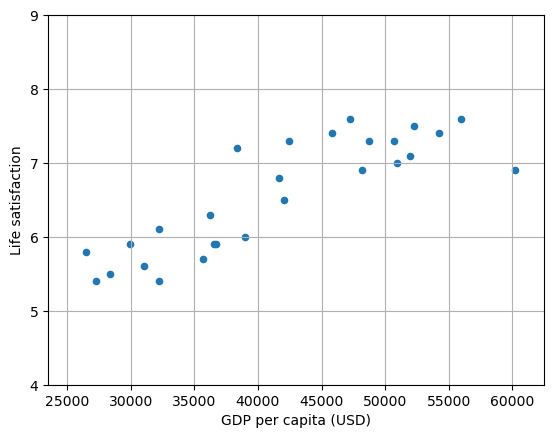

[[6.30165767]]


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

# Visualize the data
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[37_655.2]]  # Cyprus' GDP per capita in 2020
print(model.predict(X_new)) # outputs [[6.30165767]]

In [18]:
datapath = Path() / "data" / "lifesat"

oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

In [19]:
display(oecd_bli)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.40,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.50,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.70,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.00,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,0.54,NaN,NaN
2365,COL,Colombia,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,32.09,NaN,NaN
2366,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,0.67,NaN,NaN
2367,COL,Colombia,WL_EWLH,Employees working very long hours,L,Value,WMN,Women,PC,Percentage,0,Units,NaN,NaN,19.37,NaN,NaN


In [20]:
display(gdp_per_capita)

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810063
2,Afghanistan,AFG,2004,1200.278013
3,Afghanistan,AFG,2005,1286.793659
4,Afghanistan,AFG,2006,1315.789117
...,...,...,...,...
7104,Zimbabwe,ZWE,2016,3173.610829
7105,Zimbabwe,ZWE,2017,3274.611198
7106,Zimbabwe,ZWE,2018,3341.665418
7107,Zimbabwe,ZWE,2019,3027.656038


In [21]:
gdp_per_capita.columns

Index(['Entity', 'Code', 'Year',
       'GDP per capita, PPP (constant 2017 international $)'],
      dtype='object')

In [22]:
gdp_per_capita_2020 = gdp_per_capita[gdp_per_capita["Year"]==2020]
gdp_per_capita_2020 = gdp_per_capita_2020.rename(
    columns={"GDP per capita, PPP (constant 2017 international $)" : "GDP per capita"}
)
gdp_per_capita_2020

,Entity,Code,Year,GDP per capita
18,Afghanistan,AFG,2020,1978.961579
49,Africa Eastern and Southern,NaN,2020,3387.594670
80,Africa Western and Central,NaN,2020,4003.158913
111,Albania,ALB,2020,13295.410885
142,Algeria,DZA,2020,10681.679297
...,...,...,...,...
6984,Vanuatu,VUT,2020,2762.791388
7015,Vietnam,VNM,2020,8200.331867
7046,World,OWID_WRL,2020,16194.040310
7077,Zambia,ZMB,2020,3270.035112


In [23]:
oecd_bli["Indicator"].value_counts()

Indicator
Student skills                                       200
Self-reported health                                 182
Quality of support network                           168
Life satisfaction                                    168
Labour market insecurity                             162
Homicide rate                                        123
Feeling safe walking alone at night                  123
Life expectancy                                      123
Water quality                                        123
Employment rate                                      123
Years in education                                   120
Educational attainment                               120
Long-term unemployment rate                          117
Employees working very long hours                    117
Time devoted to leisure and personal care             69
Air pollution                                         41
Voter turnout                                         41
Stakeholder engagemen

In [24]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]

oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3
Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,18.0,...,25879.0,85.0,1.2,57.0,1.3,443.0,NaN,47.0,71.0,17.5
Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,...,NaN,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1
Czech Republic,20.0,0.7,94.0,5.65,74.0,72.3,0.5,21453.0,NaN,24.0,...,25372.0,91.0,1.4,60.0,1.6,491.0,NaN,61.0,87.0,17.9
Denmark,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,23.0,...,51466.0,95.0,1.9,71.0,2.0,504.0,15.87,86.0,95.0,19.5


In [25]:
oecd_bli.reset_index()

Indicator,Country,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
0,Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
1,Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
2,Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
3,Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
4,Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3
5,Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,...,25879.0,85.0,1.2,57.0,1.3,443.0,NaN,47.0,71.0,17.5
6,Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,...,NaN,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1
7,Czech Republic,20.0,0.7,94.0,5.65,74.0,72.3,0.5,21453.0,NaN,...,25372.0,91.0,1.4,60.0,1.6,491.0,NaN,61.0,87.0,17.9
8,Denmark,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,...,51466.0,95.0,1.9,71.0,2.0,504.0,15.87,86.0,95.0,19.5
9,Estonia,8.0,7.0,89.0,2.42,74.0,69.0,3.1,19697.0,159373.0,...,24336.0,92.0,1.6,53.0,2.7,524.0,14.90,64.0,84.0,17.7


In [26]:
gdp_per_capita_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 18 to 7108
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entity          224 non-null    object 
 1   Code            179 non-null    object 
 2   Year            224 non-null    int64  
 3   GDP per capita  224 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.8+ KB


In [27]:
full_country_stats = oecd_bli.merge(gdp_per_capita_2020, left_on="Country", right_on="Entity", how="inner")
full_country_stats

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Entity,Code,Year,GDP per capita
0,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,2.7,502.0,14.35,91.0,93.0,21.0,Australia,AUS,2020,48697.837028
1,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,1.3,492.0,14.55,80.0,92.0,17.0,Austria,AUT,2020,51935.603862
2,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,2.0,503.0,15.70,89.0,84.0,19.3,Belgium,BEL,2020,48210.033111
3,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,2.2,395.0,NaN,79.0,73.0,16.2,Brazil,BRA,2020,14063.982505
4,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,2.9,523.0,14.56,68.0,91.0,17.3,Canada,CAN,2020,45856.625626
5,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,18.0,...,1.3,443.0,NaN,47.0,71.0,17.5,Chile,CHL,2020,23324.524751
6,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,...,1.4,410.0,NaN,53.0,75.0,14.1,Colombia,COL,2020,13441.492952
7,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,23.0,...,2.0,504.0,15.87,86.0,95.0,19.5,Denmark,DNK,2020,55938.212809
8,8.0,7.0,89.0,2.42,74.0,69.0,3.1,19697.0,159373.0,17.0,...,2.7,524.0,14.90,64.0,84.0,17.7,Estonia,EST,2020,35638.421351
9,6.0,0.5,88.0,3.81,70.0,85.1,1.3,29943.0,200827.0,23.0,...,2.2,523.0,15.17,67.0,95.0,19.8,Finland,FIN,2020,47260.800458


In [28]:
full_country_stats.columns

Index(['Air pollution', 'Dwellings without basic facilities',
       'Educational attainment', 'Employees working very long hours',
       'Employment rate', 'Feeling safe walking alone at night',
       'Homicide rate', 'Household net adjusted disposable income',
       'Household net wealth', 'Housing expenditure',
       'Labour market insecurity', 'Life expectancy', 'Life satisfaction',
       'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Rooms per person',
       'Self-reported health',
       'Stakeholder engagement for developing regulations', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education', 'Entity', 'Code', 'Year',
       'GDP per capita'],
      dtype='object')

In [29]:
full_country_stats = full_country_stats[["Entity", "Life satisfaction", "GDP per capita"]]
# full_country_stats = full_country_stats.sort_values(by="GDP per capita (USD)")
full_country_stats

,Entity,Life satisfaction,GDP per capita
0,Australia,7.3,48697.837028
1,Austria,7.1,51935.603862
2,Belgium,6.9,48210.033111
3,Brazil,6.4,14063.982505
4,Canada,7.4,45856.625626
5,Chile,6.5,23324.524751
6,Colombia,6.3,13441.492952
7,Denmark,7.6,55938.212809
8,Estonia,5.7,35638.421351
9,Finland,7.6,47260.800458


In [30]:
full_country_stats.to_csv(datapath / "lifesat_full.csv", index=False)

In [31]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats["GDP per capita"] >= min_gdp) &
                                    (full_country_stats["GDP per capita"] <= max_gdp )]
country_stats.to_csv(datapath / "lifesat.csv", index=False)

KeyError: 'GDP '

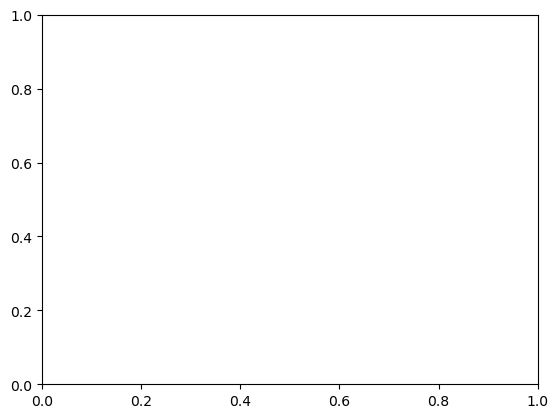

In [32]:
lifesat.plot(kind="scatter", grid=True,
             x="GDP ", y="Life")

In [ ]:
x = lifesat[["GDP (USD)"]].to.numpy()
x = lifesat[["Life"]].to.numpy()

model = LinearRegression()

model.fit(X, y)

theta_0=model.intercept_[0]
theta_1=model.coef_[0][0]
print(f"theta_0: {theta_0}")
print(f"theta_1: {theta_1}")

In [ ]:
lifesat.plot(kind='scatter', grid=True,
             x="PKB na mieszkanca (USD)", y="Satysfakcja z życia")
plt.plot(X, theta_0)

In [ ]:
cyprus_gdp_per_capita_2020 = (gdp_per_capita_2020[gdp_per_capita_2020["Entity"]=="Cyprus"[""]])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=3)

model_knn.fit(X,y)

model_knn.predict(cyprus_gdp_per_capita_2020)